In [1]:
#Import packages
#---------------------------------------
import sys
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

#Import your modules
#---------------------------------------
import admin_functions as adfn
import CCM as cfn
import LCE as lfn

# Define paths
#----------------------------------------------------------------------
Fcode = '/Users/dominicburrows/Dropbox/PhD/Analysis/my_scripts/GitHub/'
Fdata = '/Users/dominicburrows/Dropbox/PhD/analysis/Project/'
Fdoc = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/Data2process/Project/' 
F10t2 = '/Volumes/Dominic 10tb2/Data2process/Project/'
Ftm = '/Volumes/Dominic Time Machine/'
Ffig = '/Users/domiHRnicburrows/Dropbox/PhD/figures/'

%load_ext autoreload
sys.version

ImportError: No module named 'admin_functions'

In [137]:
#Import packages
#---------------------------------------
import sys
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

#Import your modules
#---------------------------------------
import admin_functions_salk as adfn
import CCM as cfn
import LCE as lfn
# Define paths

#----------------------------------------------------------------------
Fcode = '/nadata/mnlsc/home/dburrows/Documents/empirical_dynamic_modelling/'
Fdata = '/scratch/dburrows/PTZ-WILDTYPE-CCM/single/'
#Fdata = '/mnlsc/data/MCBL4/dburrows/single/'

%load_ext autoreload
sys.version

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'3.5.3 (default, Nov  4 2021, 15:29:10) \n[GCC 6.3.0 20170516]'

# Visualise Lorenz

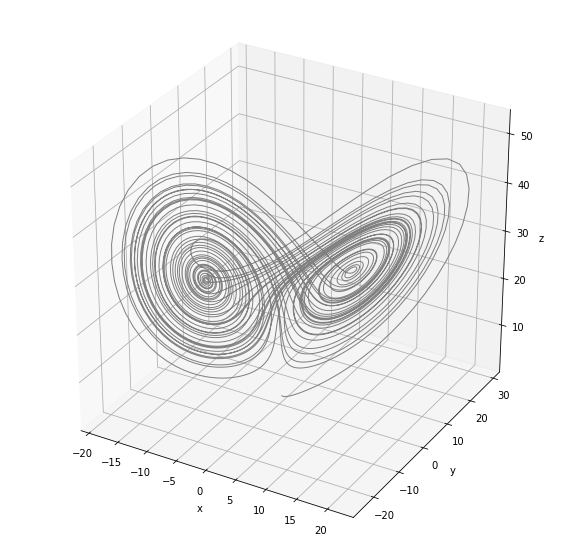

In [219]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

dt = 0.01
steps = 5https://arxiv.org/abs/2106.10627https://arxiv.org/abs/2106.10627000
sigma = 10
r = 28
b = 2.667
xs = np.empty(steps + 1)
ys = np.empty(steps + 1)
zs = np.empty(steps + 1)

# Set starting values
xs[0], ys[0], zs[0] = (0., 1., 1.05)

# Calculate the partial derivatives at each t, then estimate t+1
for i in range(steps):
    x_d, y_d, z_d = lfn.Lorenz(xs[i], ys[i], zs[i], sigma, r, b)
    xs[i + 1] = xs[i] + (x_d * dt)
    ys[i + 1] = ys[i] + (y_d * dt)
    zs[i + 1] = zs[i] + (z_d * dt)


# Visualise
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs, ys, zs, lw=1, c = 'grey')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()


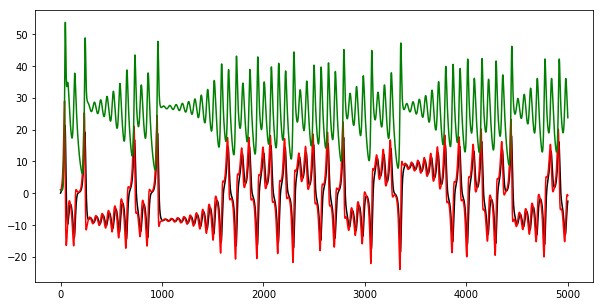

In [391]:
fig = plt.figure(figsize=(10,5))
plt.plot(xs, c = 'k')
plt.plot(ys, c = 'red')
plt.plot(zs, c = 'green')

In [392]:
xs.shape, ys.shape

((5001,), (5001,))

In [175]:
#Does X cause Y?
#Can we use Y to reconstruct X?

cause = xs #the variable being tested as a causal factor
effect = ys #the variable being influenced by the cause


In [176]:
cause

array([ 0.        ,  0.1       ,  0.189     , ..., -8.45758633,
       -8.49470017, -8.52755522])

In [448]:
# Find tau - assume it is 1 in ca2+ imaging data
tau = 10


In [ ]:
# Find E
def simplex_project()

In [527]:
data = xs
E = 3

In [450]:
# split data into library and prediction
lib = data[:data.shape[0]//2]
pred = data[data.shape[0]//2:]
lib.shape, pred.shape

((2500,), (2501,))

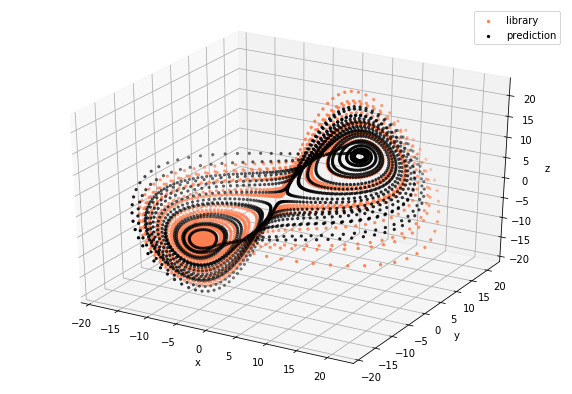

In [589]:
# Build manifold with given E and tau
lib_m = lfn.takens_embed(E, tau, lib)
pred_m = lfn.takens_embed(E, tau, pred)

#Visualise 
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(lib_m[:,0],lib_m[:,1], lib_m[:,2], s=5, c = 'coral', label = 'library')
ax.scatter3D(pred_m[:,0],pred_m[:,1], pred_m[:,2], s=5, c = 'k', label = 'prediction')

ax.legend()
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

In [528]:
import scipy

#find the E+1 nearest neighbours in library
dist_mat = scipy.spatial.distance_matrix(pred_m, lib_m) #compute distances between all points
nn_num = E+1 #how many nearest neighbours to find
pred_m.shape, lib_m.shape

((2471, 3), (2470, 3))

In [ ]:
#Loop through each point in pred

#find the E+1 nearest neighbours in library

#Loop through tp

#Simplex project

#Project back to 1d space

In [ ]:
#Correlation coefficient

In [544]:
# Find nearest neighbours in library for each pred_m point
num = 0
current_point = pred_m[num]
curr_dist = dist_mat[num]
nn_ind = sorted(range(len(curr_dist)), key=lambda k: curr_dist[k])[:nn_num] #return indeces of nearest neighbours in library

In [545]:
#Calculate weights for simplex projection - weights are calculated from nn distance at t0
nn = lib_m[nn_ind] #positions of nearest neighbours in library, to current point in pred
nn

array([[12.07374707,  3.50424754, -0.57220676],
       [12.84187955,  4.20108772, -0.34344221],
       [11.53667285,  3.61499861, -0.05775765],
       [11.96785091,  4.0257502 ,  0.12192562]])

In [531]:
nn_dist = dist_mat[num, nn_ind]  #distances of each nn to our pred point
w_mat = np.exp(-1*(nn_dist/np.min(nn_dist))) #matrix of weights for each nn 
w_mat

array([0.36787944, 0.16014802, 0.09439513, 0.09388717])

In [533]:
# Loop in time and predict
t = 1

# Where do nn end up at t + n
nn_ind_tp = np.array(nn_ind) + t #find indeces of neighbours in the future for simplex projection
nn_tp = lib_m[nn_ind_tp] # locations of neighbours in future

In [536]:
current_point

array([12.49209571,  3.45466713, -0.92888527])

In [547]:
nn

array([[12.07374707,  3.50424754, -0.57220676],
       [12.84187955,  4.20108772, -0.34344221],
       [11.53667285,  3.61499861, -0.05775765],
       [11.96785091,  4.0257502 ,  0.12192562]])

In [540]:
nn_tp

array([[11.22884971,  2.86806221, -0.77714785],
       [12.07374707,  3.50424754, -0.57220676],
       [10.73091938,  3.03754237, -0.23638097],
       [11.20301704,  3.41862806, -0.06812064]])

In [585]:
np.expand_dims(colormap[0], 0).shape

(1, 4)

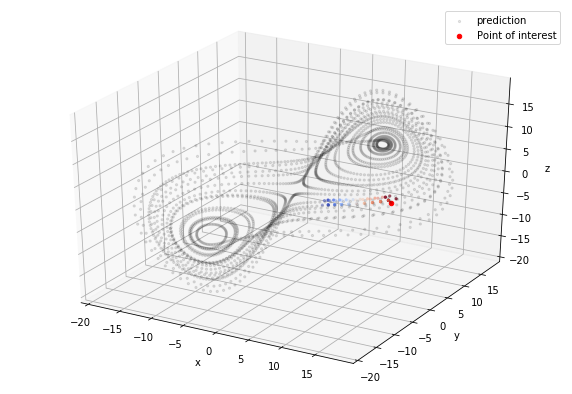

In [592]:
from matplotlib import cm
colormap = cm.coolwarm_r(np.linspace(0, 1, 10))

#Show nearest neighbours over time
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(pred_m[:,0],pred_m[:,1], pred_m[:,2], s=5, c = 'k', label = 'prediction', alpha = 0.1)

ax.scatter3D(current_point[0],current_point[1], current_point[2], s=20, c = 'red', label = 'Point of interest')
ax.scatter3D(nn[:,0],nn[:,1],nn[:,2], s=5, c = 'k')

# Loop in time and predict
for t in range(10):
    # Where do nn end up at t + n
    nn_ind_tp = np.array(nn_ind) + t #find indeces of neighbours in the future for simplex projection
    nn_tp = lib_m[nn_ind_tp] # locations of neighbours in future
    ax.scatter3D(nn_tp[:,0],nn_tp[:,1],nn_tp[:,2], s=5, c = np.expand_dims(colormap[t], 0))

ax.legend()
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

In [ ]:
from matplotlib import cm
colormap = cm.coolwarm_r(np.linspace(0, 1, 10))

#Compare reconstructed with true
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(pred_m[:,0],pred_m[:,1], pred_m[:,2], s=5, c = 'k', label = 'prediction', alpha = 0.1)

ax.scatter3D(current_point[0],current_point[1], current_point[2], s=20, c = 'red')
ax.scatter3D(nn[:,0],nn[:,1],nn[:,2], s=5, c = 'k')

# Loop in time and predict
for t in range(10):
    # Where do nn end up at t + n
    nn_ind_tp = np.array(nn_ind) + t #find indeces of neighbours in the future for simplex projection
    nn_tp = lib_m[nn_ind_tp] # locations of neighbours in future
    ax.scatter3D(nn_tp[:,0],nn_tp[:,1],nn_tp[:,2], s=5, c = np.expand_dims(colormap[t], 0))
    
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

In [ ]:
#What about edge effects? 

In [525]:
#Simple project - how much do the positions of neighbours relative to point of interest change over time 
#use weights from t 0
#use neighbour points from t + n
x_tp = pred[num] #Point I am trying to predict

x_tp_pred = 0
for nn_i in range(w_mat.shape[0]): #Loop through each nn and sum over the weight*position at tp
    x_tp_pred+= (w_mat[nn_i]/np.sum(w_mat))*nn_tp[nn_i]
x_tp_pred = x_tp_pred[0] #project back into 1d space
x_tp_pred

11.34874349019227

In [526]:
x_tp, x_tp_pred

(12.492095712022751, 11.34874349019227)

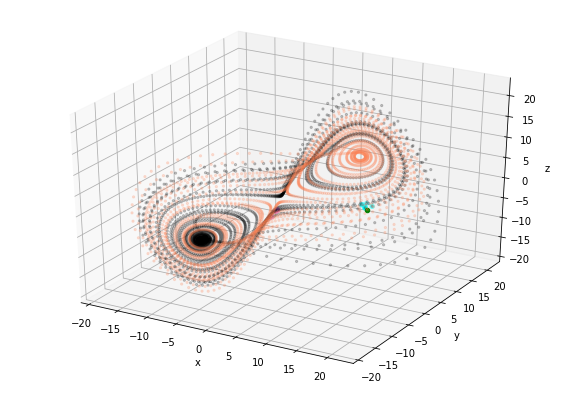

In [388]:
#Show nearest neighbours
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(emb_lib[:,0],emb_lib[:,1], emb_lib[:,2], s=5, c = 'k', alpha = 0.2)
ax.scatter3D(emb_pred[:,0],emb_pred[:,1], emb_pred[:,2], s=5, c = 'coral', alpha = 0.2)

ax.scatter3D(emb_pred[num,0],emb_pred[num,1], emb_pred[num,2], s=20, c = 'green')
ax.scatter3D(emb_lib[nn_ind][:,0],emb_lib[nn_ind][:,1], emb_lib[nn_ind][:,2], s=20, c = 'cyan')
ax.scatter3D(emb_lib[new_nn_ind][:,0],emb_lib[new_nn_ind][:,1], emb_lib[new_nn_ind][:,2], s=20, c = 'violet')

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

AttributeError: 'NoneType' object has no attribute 'plot'

<Figure size 720x720 with 0 Axes>

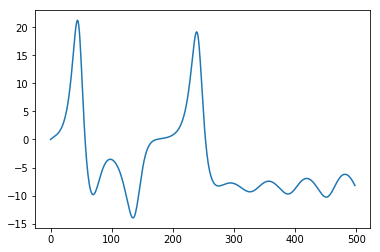

In [186]:
plt.plot(lfn.takens_embed(E, tau, lib))

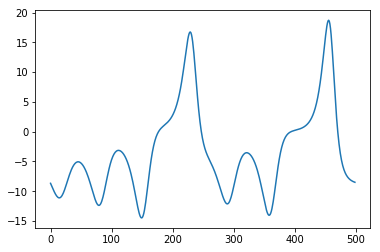

In [187]:
plt.plot(lfn.takens_embed(E, tau, pred))

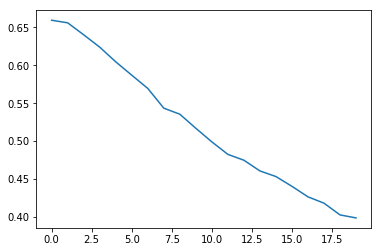

In [159]:
# Find tau - default = 1

data = tr[0]

MI_list = []
for i in range(1,21):
    MI_list = np.append(MI_list,[lfn.MI(data,i,50)])

plt.plot(MI_list)

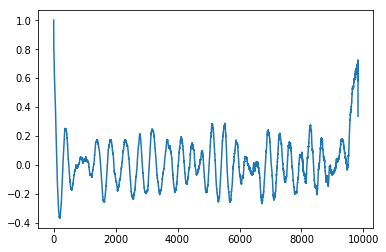

In [174]:
plt.plot(estimated_autocorrelation(np.float64(tr[0])))

In [ ]:
#Build shadow manifold

In [ ]:
#find E+1 nearest neighbours for each point

In [ ]:
#Do cross simplex projection